# Dataset 
(https://www.kaggle.com/datasets/einsteindata4u/covid19)

This dataset contains anonymized data from patients seen at the Hospital Israelita Albert Einstein, at São Paulo, Brazil, and who had samples collected to perform the SARS-CoV-2 RT-PCR and additional laboratory tests during a visit to the hospital.

All data were anonymized following the best international practices and recommendations. All clinical data were standardized to have a mean of zero and a unit standard deviation.

# Task Details

• Predict confirmed COVID-19 cases among suspected cases.
Based on the results of laboratory tests commonly collected for a suspected COVID-19 case during a visit to the emergency room, would it be possible to predict the test result for SARS-Cov-2 (positive/negative)?

# Covid 19 Prediction, using Supervised Machine Learning and Accuracies Comparison .

In [ ]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense




Import Libraries

In [ ]:
# Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.ensemble import ExtraTreesClassifier
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from sklearn.pipeline import Pipeline

Load data

In [ ]:
data = pd.read_excel('dataset.xlsx')

In [ ]:
data.info()
data.describe()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB


,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.shape

(5644, 111)

Feature Engineering!

In [ ]:
# Drop unused columns
data.drop('Patient ID', axis=1, inplace=True)

In [ ]:
#column name to lower case
data.columns = [x.lower().strip().replace(' ','_') for x in data.columns]

In [ ]:
# List to keep all categorical feature
cat_vars = list()
# Loop to evaluate if it's categorical
for j in data.columns:
    if len(data[j].unique()) <= 5:
        cat_vars.append(j)
        print('Discrete variable - ',j)
print('This dataset have ',len(cat_vars), 'of ', len(data.columns),' discrete variables with 5 or less categories.')

Discrete variable -  sars-cov-2_exam_result
Discrete variable -  patient_addmited_to_regular_ward_(1=yes,_0=no)
Discrete variable -  patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)
Discrete variable -  patient_addmited_to_intensive_care_unit_(1=yes,_0=no)
Discrete variable -  respiratory_syncytial_virus
Discrete variable -  influenza_a
Discrete variable -  influenza_b
Discrete variable -  parainfluenza_1
Discrete variable -  coronavirusnl63
Discrete variable -  rhinovirus/enterovirus
Discrete variable -  mycoplasma_pneumoniae
Discrete variable -  coronavirus_hku1
Discrete variable -  parainfluenza_3
Discrete variable -  chlamydophila_pneumoniae
Discrete variable -  adenovirus
Discrete variable -  parainfluenza_4
Discrete variable -  coronavirus229e
Discrete variable -  coronavirusoc43
Discrete variable -  inf_a_h1n1_2009
Discrete variable -  bordetella_pertussis
Discrete variable -  metapneumovirus
Discrete variable -  parainfluenza_2
Discrete variable -  influenza_b,_rapid_test


Knowing that from 47 discrete variables, 4 are target. We have 43 discrete features possibles to our model. Besides that, there is a discrete variable with more than 5 categories:

patient_age_quantile

In [ ]:
# Print categories for 'patient_age_quantile'
data['patient_age_quantile'].unique()

array([13, 17,  8,  5, 15,  9, 16,  1, 14, 11,  0,  3, 10,  6, 12, 19,  7,
       18,  2,  4])

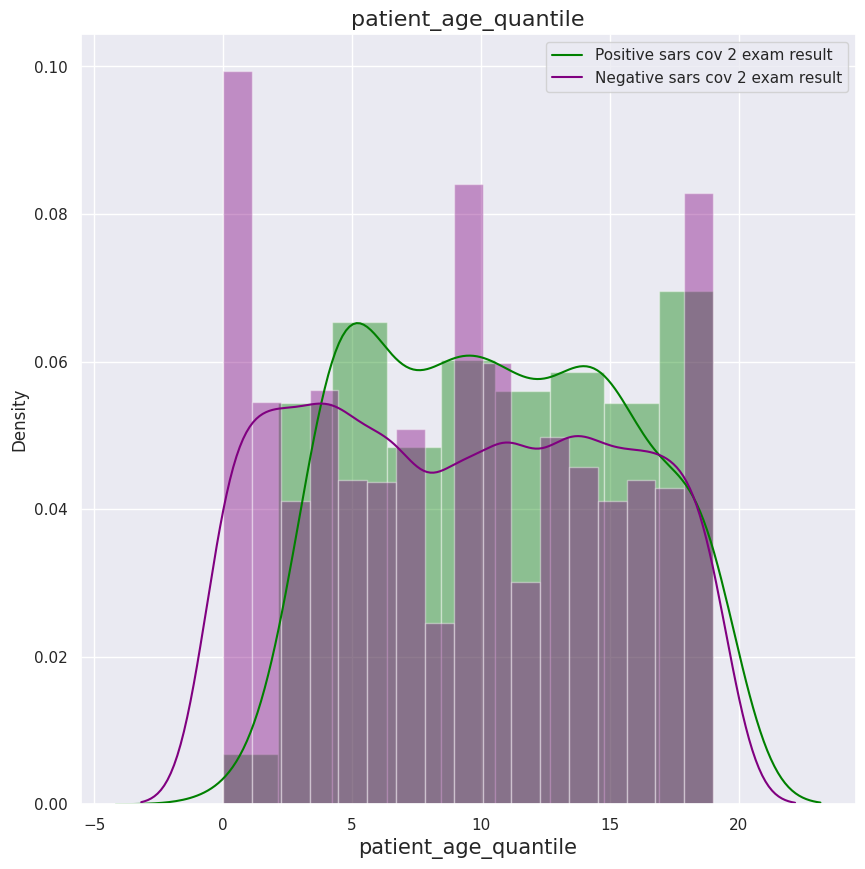

In [ ]:
def plot_dist_col(column):
    pos__df = data[data['sars-cov-2_exam_result'] ==1]
    neg__df = data[data['sars-cov-2_exam_result'] ==0]

    '''plot dist curves for train and test weather data for the given column name'''
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.distplot(pos__df[column].dropna(), color='green', ax=ax).set_title(column, fontsize=16)
    sns.distplot(neg__df[column].dropna(), color='purple', ax=ax).set_title(column, fontsize=16)
    plt.xlabel(column, fontsize=15)
    plt.legend(['Positive sars cov 2 exam result', 'Negative sars cov 2 exam result'])
    plt.show()
plot_dist_col('patient_age_quantile')

In [ ]:
# Eval categories for all discrete features
for c in cat_vars:
    print(c, ' - ', data[c].unique())

sars-cov-2_exam_result  -  ['negative' 'positive']
patient_addmited_to_regular_ward_(1=yes,_0=no)  -  [0 1]
patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)  -  [0 1]
patient_addmited_to_intensive_care_unit_(1=yes,_0=no)  -  [0 1]
respiratory_syncytial_virus  -  [nan 'not_detected' 'detected']
influenza_a  -  [nan 'not_detected' 'detected']
influenza_b  -  [nan 'not_detected' 'detected']
parainfluenza_1  -  [nan 'not_detected' 'detected']
coronavirusnl63  -  [nan 'not_detected' 'detected']
rhinovirus/enterovirus  -  [nan 'detected' 'not_detected']
mycoplasma_pneumoniae  -  [nan]
coronavirus_hku1  -  [nan 'not_detected' 'detected']
parainfluenza_3  -  [nan 'not_detected' 'detected']
chlamydophila_pneumoniae  -  [nan 'not_detected' 'detected']
adenovirus  -  [nan 'not_detected' 'detected']
parainfluenza_4  -  [nan 'not_detected' 'detected']
coronavirus229e  -  [nan 'not_detected' 'detected']
coronavirusoc43  -  [nan 'not_detected' 'detected']
inf_a_h1n1_2009  -  [nan 'not_detected' 

In [ ]:
# How many nan have each column
nan_per_column = pd.DataFrame(data.isna().sum(),columns=['nanValues']).reset_index()

# Calculate NaN % for each feature
for i in range(0,len(nan_per_column)):
    nan_per_column.loc[i, 'nanValuesPct'] = 100*round(nan_per_column.loc[i, 'nanValues']/len(data),3)

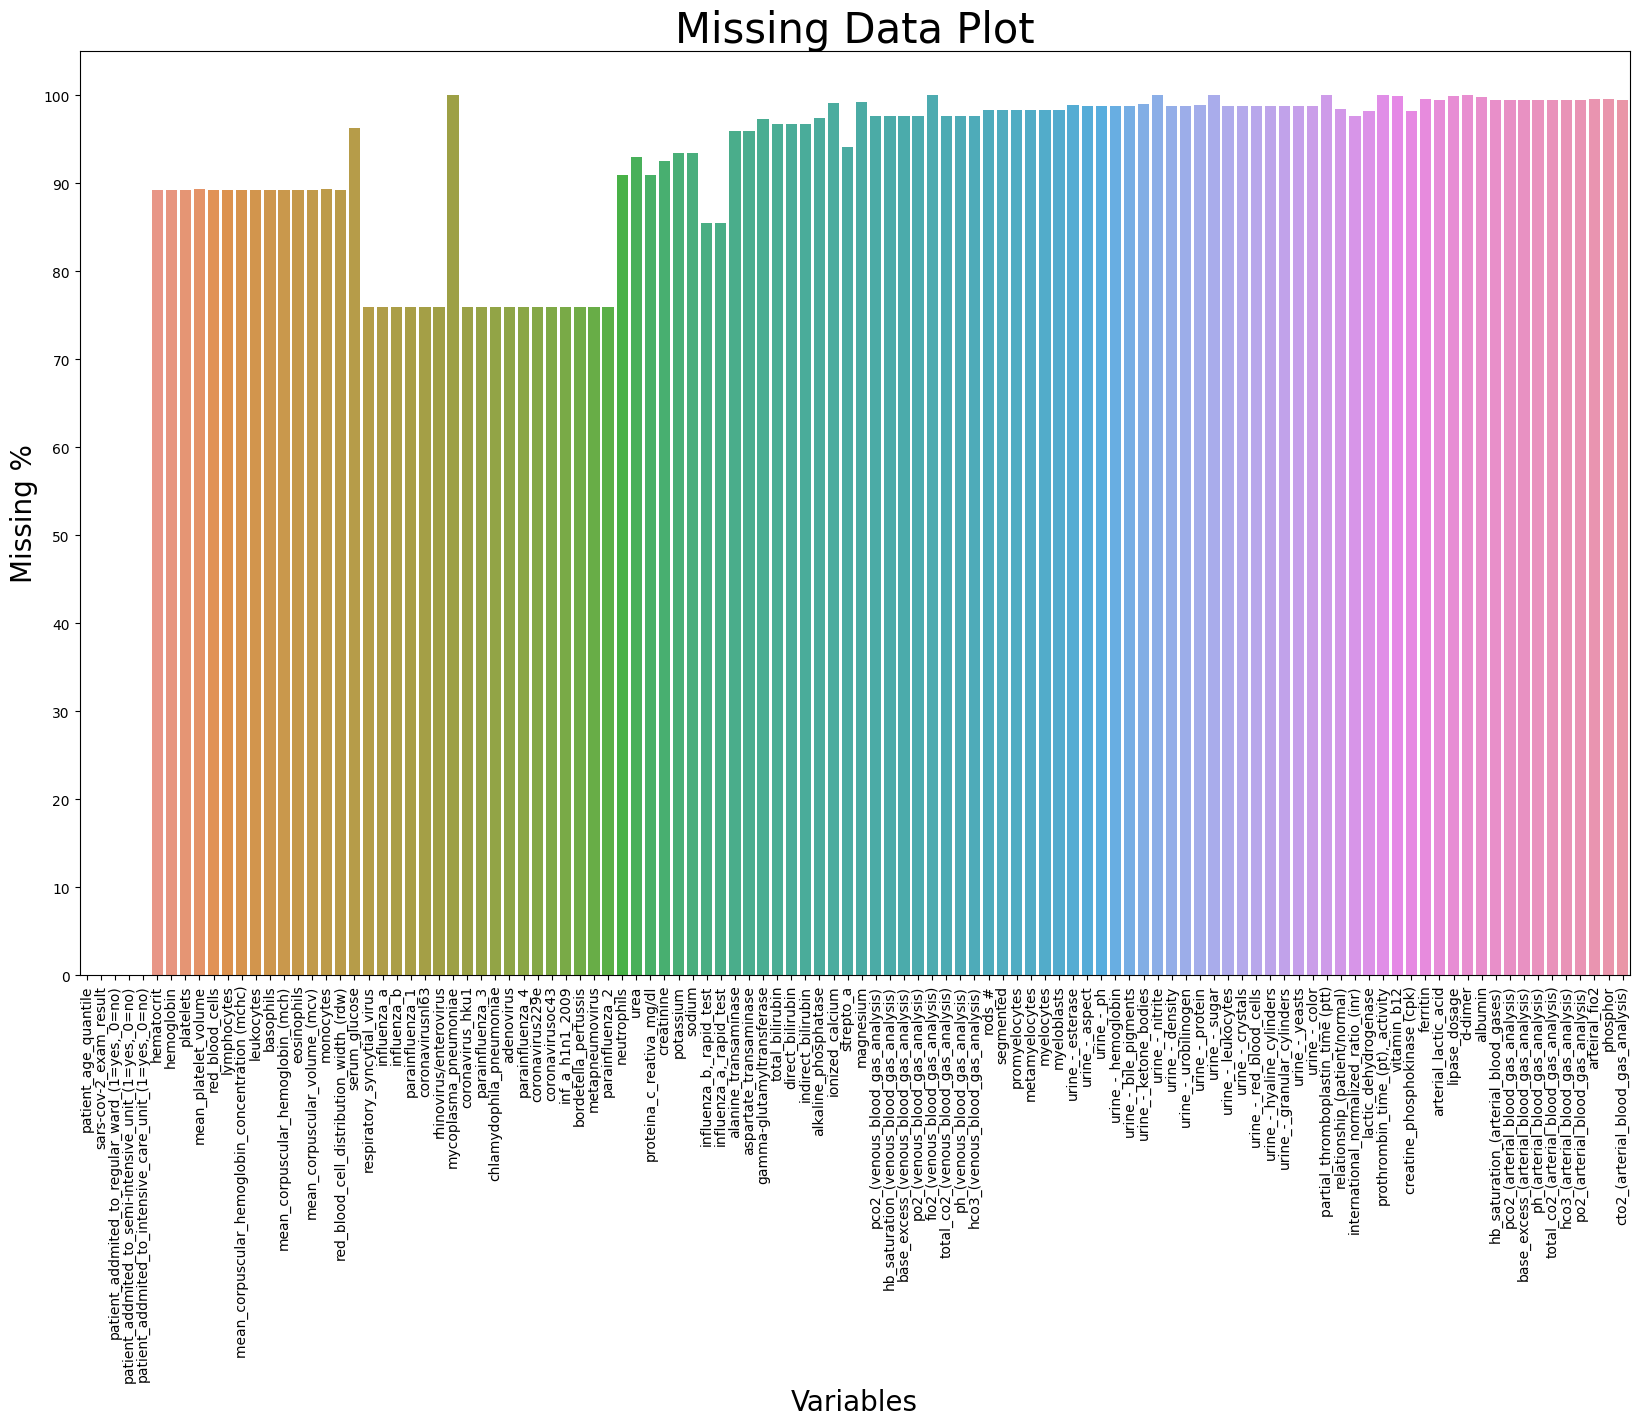

In [ ]:
# Plot - % of missing rows for each column
plt.figure(figsize=(20,12))
sns.barplot(x="index", y="nanValuesPct", data=nan_per_column)
plt.xlabel('Variables', fontsize=20)
plt.ylabel('Missing %', fontsize=20)
plt.title('Missing Data Plot', fontsize=30)
plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
plt.xticks(rotation=90);

In [ ]:
def missing_values_table(data):
        # Total missing values
        mis_val = data.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * data.isnull().sum() / len(data)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(data.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns


In [ ]:
data.isna().sum()

patient_age_quantile                                        0
sars-cov-2_exam_result                                      0
patient_addmited_to_regular_ward_(1=yes,_0=no)              0
patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)       0
patient_addmited_to_intensive_care_unit_(1=yes,_0=no)       0
                                                         ... 
hco3_(arterial_blood_gas_analysis)                       5617
po2_(arterial_blood_gas_analysis)                        5617
arteiral_fio2                                            5624
phosphor                                                 5624
cto2_(arterial_blood_gas_analysis)                       5617
Length: 110, dtype: int64

In [ ]:
missing_values_table(data)

Your selected dataframe has 110 columns.
There are 105 columns that have missing values.


,Missing Values,% of Total Values
urine_-_sugar,5644,100.0
partial_thromboplastin_time (ptt),5644,100.0
mycoplasma_pneumoniae,5644,100.0
"prothrombin_time_(pt),_activity",5644,100.0
d-dimer,5644,100.0
...,...,...
parainfluenza_1,4292,76.0
parainfluenza_4,4292,76.0
respiratory_syncytial_virus,4290,76.0
influenza_a,4290,76.0


In [ ]:
#label encoding on columns with type object
for x in data.columns:
    if data[x].dtype=='float16' or  data[x].dtype=='float32' or  data[x].dtype=='float64':
        data[x].fillna(data[x].mean())
#fill na with -999
data = data.fillna(-999)

for y in data.columns:
    if data[y].dtype=='object': 
        lbl = LabelEncoder()
        lbl.fit(list(data[y].values))
        data[y] = lbl.transform(list(data[y].values))

It is worth noting that replacing missing values with -999 is just one of many possible techniques for dealing with missing data. 

In [ ]:
#feature correlation
threshold = 0.92

corr_matrix = data.corr().abs()
corr_matrix.head()

,patient_age_quantile,sars-cov-2_exam_result,"patient_addmited_to_regular_ward_(1=yes,_0=no)","patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)","patient_addmited_to_intensive_care_unit_(1=yes,_0=no)",hematocrit,hemoglobin,platelets,mean_platelet_volume,red_blood_cells,...,hb_saturation_(arterial_blood_gases),pco2_(arterial_blood_gas_analysis),base_excess_(arterial_blood_gas_analysis),ph_(arterial_blood_gas_analysis),total_co2_(arterial_blood_gas_analysis),hco3_(arterial_blood_gas_analysis),po2_(arterial_blood_gas_analysis),arteiral_fio2,phosphor,cto2_(arterial_blood_gas_analysis)
patient_age_quantile,1.000000,0.075244,0.046166,0.015736,0.035772,0.109140,0.109128,0.109860,0.107703,0.109901,...,0.051720,0.051703,0.051778,0.051778,0.051743,0.051749,0.051730,0.050366,0.020413,0.051732
sars-cov-2_exam_result,0.075244,1.000000,0.142437,0.019364,0.027586,0.044974,0.044976,0.045045,0.042017,0.045206,...,0.088889,0.088836,0.088889,0.088910,0.088845,0.088849,0.088910,0.070122,0.009768,0.088905
"patient_addmited_to_regular_ward_(1=yes,_0=no)",0.046166,0.142437,1.000000,0.011264,0.010192,0.241889,0.241885,0.242051,0.238041,0.242164,...,0.144795,0.144685,0.144753,0.144797,0.144703,0.144710,0.144771,0.145138,0.007105,0.144815
"patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)",0.015736,0.019364,0.011264,1.000000,0.008087,0.224213,0.224218,0.224609,0.225239,0.224473,...,0.267281,0.267521,0.267400,0.267417,0.267440,0.267432,0.267359,0.153438,0.185337,0.267463
"patient_addmited_to_intensive_care_unit_(1=yes,_0=no)",0.035772,0.027586,0.010192,0.008087,1.000000,0.166123,0.166127,0.166564,0.166904,0.166349,...,0.145370,0.145353,0.145323,0.145201,0.145393,0.145389,0.145308,0.170561,0.170495,0.145137


In [ ]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

,patient_age_quantile,sars-cov-2_exam_result,"patient_addmited_to_regular_ward_(1=yes,_0=no)","patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)","patient_addmited_to_intensive_care_unit_(1=yes,_0=no)",hematocrit,hemoglobin,platelets,mean_platelet_volume,red_blood_cells,...,hb_saturation_(arterial_blood_gases),pco2_(arterial_blood_gas_analysis),base_excess_(arterial_blood_gas_analysis),ph_(arterial_blood_gas_analysis),total_co2_(arterial_blood_gas_analysis),hco3_(arterial_blood_gas_analysis),po2_(arterial_blood_gas_analysis),arteiral_fio2,phosphor,cto2_(arterial_blood_gas_analysis)
patient_age_quantile,NaN,0.075244,0.046166,0.015736,0.035772,0.109140,0.109128,0.109860,0.107703,0.109901,...,0.051720,0.051703,0.051778,0.051778,0.051743,0.051749,0.051730,0.050366,0.020413,0.051732
sars-cov-2_exam_result,NaN,NaN,0.142437,0.019364,0.027586,0.044974,0.044976,0.045045,0.042017,0.045206,...,0.088889,0.088836,0.088889,0.088910,0.088845,0.088849,0.088910,0.070122,0.009768,0.088905
"patient_addmited_to_regular_ward_(1=yes,_0=no)",NaN,NaN,NaN,0.011264,0.010192,0.241889,0.241885,0.242051,0.238041,0.242164,...,0.144795,0.144685,0.144753,0.144797,0.144703,0.144710,0.144771,0.145138,0.007105,0.144815
"patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)",NaN,NaN,NaN,NaN,0.008087,0.224213,0.224218,0.224609,0.225239,0.224473,...,0.267281,0.267521,0.267400,0.267417,0.267440,0.267432,0.267359,0.153438,0.185337,0.267463
"patient_addmited_to_intensive_care_unit_(1=yes,_0=no)",NaN,NaN,NaN,NaN,NaN,0.166123,0.166127,0.166564,0.166904,0.166349,...,0.145370,0.145353,0.145323,0.145201,0.145393,0.145389,0.145308,0.170561,0.170495,0.145137


In [ ]:
#remove unimportant columns with threshold less than 0.92
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))
dataset = data.drop(columns = to_drop)
print('Data shape: ', data.shape)
print('Size of the data', data.shape)

There are 64 columns to remove.
Data shape:  (5644, 110)
Size of the data (5644, 110)


In [ ]:
# 
data_missing = (data.isnull().sum() / len(data)).sort_values(ascending = False)
data_missing.head()

patient_age_quantile    0.0
myeloblasts             0.0
urine_-_sugar           0.0
urine_-_protein         0.0
urine_-_urobilinogen    0.0
dtype: float64

In [ ]:
data_missing_ = data_missing.index[data_missing > 0.85]
all_missing = list(set(data_missing_))

In [ ]:
dataset = dataset.drop(columns = all_missing)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 46 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   patient_age_quantile                                   5644 non-null   int64  
 1   sars-cov-2_exam_result                                 5644 non-null   int64  
 2   patient_addmited_to_regular_ward_(1=yes,_0=no)         5644 non-null   int64  
 3   patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)  5644 non-null   int64  
 4   patient_addmited_to_intensive_care_unit_(1=yes,_0=no)  5644 non-null   int64  
 5   hematocrit                                             5644 non-null   float64
 6   serum_glucose                                          5644 non-null   float64
 7   respiratory_syncytial_virus                            5644 non-null   int64  
 8   mycoplasma_pneumoniae                           

In [ ]:
#select columns for modeling
cols = [x for x in dataset.columns if x not in ['patient_id','sars-cov-2_exam_result', 'patient_addmited_to_regular_ward_(1=yes,_0=no)', 'patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)', 'patient_addmited_to_intensive_care_unit_(1=yes,_0=no)']]

In [ ]:
new_df = dataset[cols]

In [ ]:
new_df.head()

,patient_age_quantile,hematocrit,serum_glucose,respiratory_syncytial_virus,mycoplasma_pneumoniae,neutrophils,urea,proteina_c_reativa_mg/dl,potassium,"influenza_b,_rapid_test",...,"prothrombin_time_(pt),_activity",vitamin_b12,creatine_phosphokinase (cpk),ferritin,arterial_lactic_acid,lipase_dosage,d-dimer,albumin,arteiral_fio2,phosphor
0,13,-999.000000,-999.000000,0,-999.0,-999.000000,-999.000000,-999.000000,-999.000000,0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
1,17,0.236515,-0.140648,2,-999.0,-0.619086,1.198059,-0.147895,-0.305787,1,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2,8,-999.000000,-999.000000,0,-999.0,-999.000000,-999.000000,-999.000000,-999.000000,0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
3,5,-999.000000,-999.000000,0,-999.0,-999.000000,-999.000000,-999.000000,-999.000000,0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
4,15,-999.000000,-999.000000,2,-999.0,-999.000000,-999.000000,-999.000000,-999.000000,0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0


In [ ]:
new_df.isnull().sum() / len(new_df)

patient_age_quantile                    0.0
hematocrit                              0.0
serum_glucose                           0.0
respiratory_syncytial_virus             0.0
mycoplasma_pneumoniae                   0.0
neutrophils                             0.0
urea                                    0.0
proteina_c_reativa_mg/dl                0.0
potassium                               0.0
influenza_b,_rapid_test                 0.0
alanine_transaminase                    0.0
gamma-glutamyltransferase               0.0
total_bilirubin                         0.0
ionized_calcium                         0.0
strepto_a                               0.0
magnesium                               0.0
pco2_(venous_blood_gas_analysis)        0.0
fio2_(venous_blood_gas_analysis)        0.0
rods_#                                  0.0
urine_-_esterase                        0.0
urine_-_aspect                          0.0
urine_-_ph                              0.0
urine_-_hemoglobin              

Positive cases:  558  | Negative cases:  5086 

sars-cov-2_exam_result
0    5086
1     558
dtype: int64


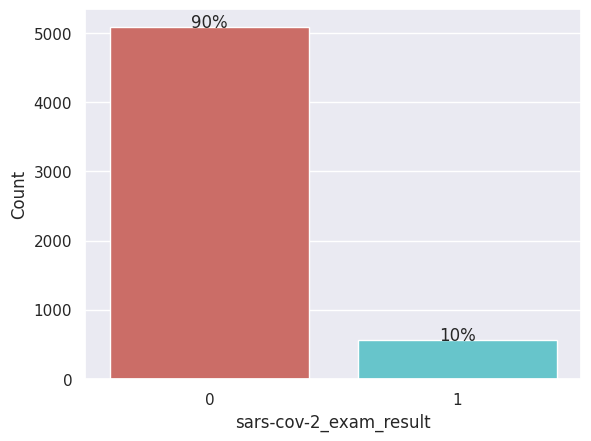

In [ ]:

%matplotlib inline
sns.set(style="darkgrid")
sns.set_palette("hls", 2)

#What is the number of positive/negative cases in this complete dataset?
print('Positive cases: ', sum(dataset['sars-cov-2_exam_result'] == 1),' | Negative cases: ', sum(dataset['sars-cov-2_exam_result'] == 0),'\n')

# lets visualize exam_result count
print(dataset.groupby(['sars-cov-2_exam_result']).size())
de_plot = sns.countplot(data=dataset, x='sars-cov-2_exam_result', order=dataset['sars-cov-2_exam_result'].value_counts().index)
plt.ylabel('Count')
for p in de_plot.patches:
    height = p.get_height()
    de_plot.text(p.get_x()+p.get_width()/2., height + 1,'{0:.0%}'.format(height/float(len(dataset))),ha="center") 
plt.show()

In [ ]:
#feature correlation
corr_cols = cols+['sars-cov-2_exam_result']
corr_matrix = dataset[corr_cols].corr()
corr_matrix['sars-cov-2_exam_result'].sort_values(ascending=False)


sars-cov-2_exam_result                  1.000000
arterial_lactic_acid                    0.088860
patient_age_quantile                    0.075244
total_bilirubin                         0.073915
lactic_dehydrogenase                    0.071729
arteiral_fio2                           0.070122
creatine_phosphokinase (cpk)            0.056124
gamma-glutamyltransferase               0.054395
alanine_transaminase                    0.053901
potassium                               0.051042
neutrophils                             0.050128
urea                                    0.045823
hematocrit                              0.044974
proteina_c_reativa_mg/dl                0.041528
serum_glucose                           0.039177
international_normalized_ratio_(inr)    0.038541
lipase_dosage                           0.034866
relationship_(patient/normal)           0.028300
urine_-_esterase                        0.028066
urine_-_aspect                          0.027256
pco2_(venous_blood_g

In [ ]:
# Correlation with output variable
cor_target = corr_matrix['sars-cov-2_exam_result']
# Selecting highly correlated features
relevant_features = cor_target[cor_target>0.03].index.tolist()

<Axes: >

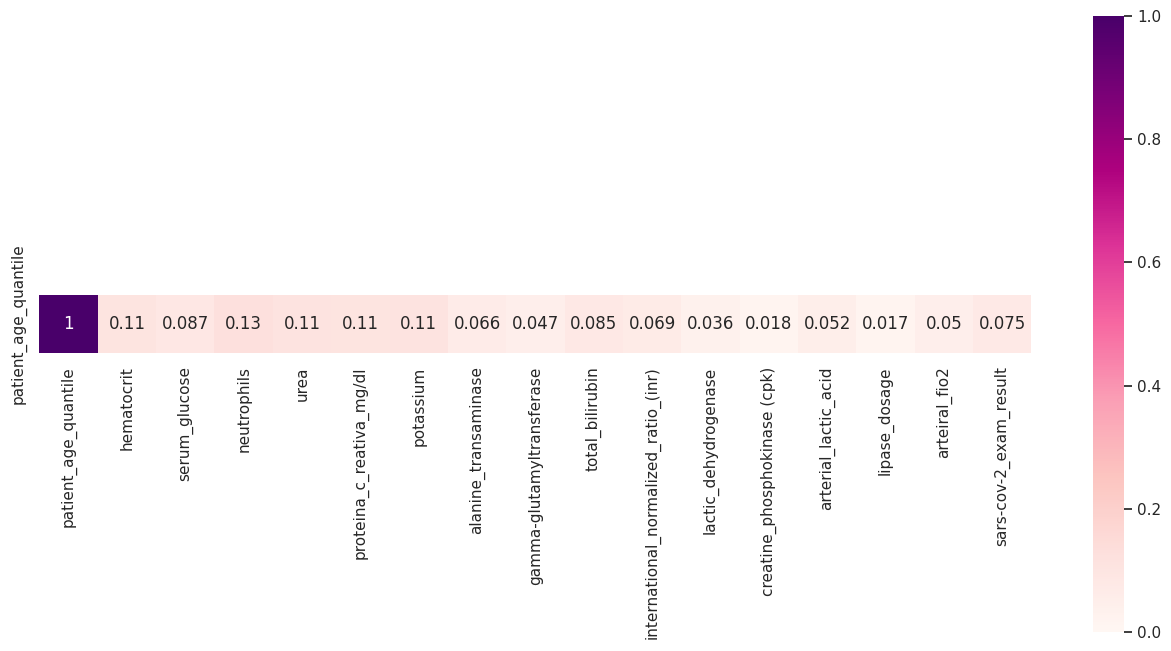

In [ ]:
f, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(abs(dataset[relevant_features].corr().iloc[0:1, :]), yticklabels=[relevant_features[0]], xticklabels=relevant_features, vmin = 0.0, square=True, annot=True, vmax=1.0, cmap='RdPu')

In [ ]:
# Number of each type of column
new_df.dtypes.value_counts()

float64    30
int64      12
dtype: int64

## Machine Learning 

## Feature Engineering using Extra Tree Clasifiers

Feature Importance using Extra Trees Classifier - keep it 

In [ ]:
X = new_df
y = dataset['sars-cov-2_exam_result']


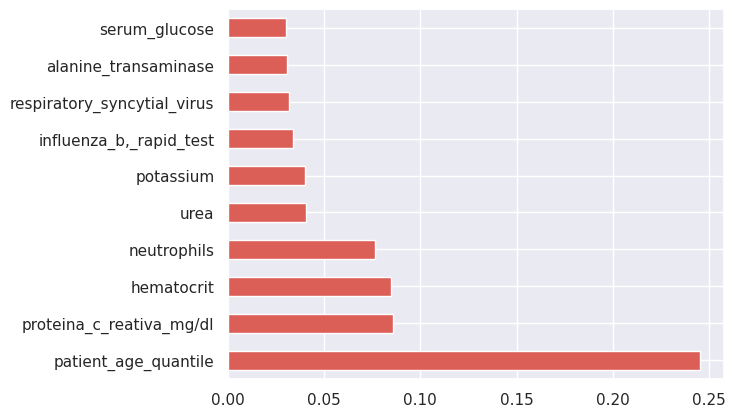

In [ ]:
extra_tree_clf = ExtraTreesClassifier()
extra_tree_clf.fit(X,y)
#print(extra_tree_clf.feature_importances_) 
#plot graph of feature importances for better visualization
feat_importances = pd.Series(extra_tree_clf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
feat_head = feat_importances.head(10)
feat_head.index

Index(['patient_age_quantile', 'hematocrit', 'serum_glucose',
       'respiratory_syncytial_virus', 'mycoplasma_pneumoniae', 'neutrophils',
       'urea', 'proteina_c_reativa_mg/dl', 'potassium',
       'influenza_b,_rapid_test'],
      dtype='object')

In [ ]:
X = new_df[feat_head.index]
y = dataset['sars-cov-2_exam_result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 101)

ML Models

In [ ]:
accuracy_list =[]

def model_assess(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_acc = accuracy_score(y_test, y_pred)
    accuracy_list.append(100*model_acc)

    print('---', name, '---', '\n',
          'Accuracy:', (accuracy_score(y_test, y_pred)), '\n',
           confusion_matrix(y_test, y_pred), '\n',
          'Classification Report:\n', (classification_report(y_test, y_pred)))

## Baseline models

In [ ]:
lg = LogisticRegression()
model_assess(lg, 'Logistic Regression')

rforest = RandomForestClassifier()
model_assess(rforest, 'Random Forest')

xgb = XGBClassifier()
model_assess(xgb, 'XGBoost')


nn = MLPClassifier()
model_assess(nn, 'Neural Nets')

--- Logistic Regression --- 
 Accuracy: 0.90552871712292 
 [[1687    0]
 [ 176    0]] 
 Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      1687
           1       0.00      0.00      0.00       176

    accuracy                           0.91      1863
   macro avg       0.45      0.50      0.48      1863
weighted avg       0.82      0.91      0.86      1863

--- Random Forest --- 
 Accuracy: 0.9066022544283414 
 [[1687    0]
 [ 174    2]] 
 Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      1687
           1       1.00      0.01      0.02       176

    accuracy                           0.91      1863
   macro avg       0.95      0.51      0.49      1863
weighted avg       0.92      0.91      0.86      1863

--- XGBoost --- 
 Accuracy: 0.903918411164788 
 [[1679    8]
 [ 171    5]] 
 Classification Report:
               precision  

In [ ]:
n_features = X_train.shape[1]
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=250, batch_size=32, verbose=0)
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy of tensor flow dense neural network : %.3f' % acc)


Accuracy of tensor flow dense neural network : 0.886


In [ ]:
pipe_lr = Pipeline([
                  ('LR', LogisticRegression(random_state=42))
])

pipe_rf = Pipeline([ 
                  ('RF', RandomForestClassifier(random_state=42))

])

pipe_xgb = Pipeline([
                    ('XGB', XGBClassifier(random_state=42))
])


In [ ]:
lr_param_grid = [{
    'LR__C': [0.01, 0.1, 1, 10],
    'LR__penalty': ['l1', 'l2'],
    'LR__max_iter': [100,500,700,900],
    'LR__solver': ['newton-cg', 'lbfgs', 'liblinear']
}]

rf_param_grid = [{ 
    'RF__n_estimators': [200, 500,1000],
    'RF__max_features': ['auto', 'sqrt', 'log2'],
    'RF__max_depth' : [4,5,6,7,8],
    'RF__criterion' :['gini', 'entropy']
}]

xgb_param_grid = [{
        'XGB__n_estimators' : [100,500,1000],
        'XGB__gamma': [0.5, 1, 1.5, 2, 5],
        'XGB__subsample': [0.6, 0.8, 1.0],
        'XGB__colsample_bytree': [0.6, 0.8, 1.0],
        'XGB__max_depth': [3, 4, 5]
        }]


In [ ]:
lr_grid_search = GridSearchCV(estimator=pipe_lr,
                              param_grid=lr_param_grid, 
                              scoring ='accuracy',
                              cv=5, n_jobs=-1) 

rf_grid_search = GridSearchCV(estimator = pipe_rf,
                              param_grid = rf_param_grid,
                              scoring = 'accuracy',
                              cv=5, n_jobs=-1)


xgb_grid_search = GridSearchCV(estimator = pipe_xgb,
                              param_grid = xgb_param_grid,
                              scoring = 'accuracy',
                              cv=5, n_jobs=-1)


In [ ]:
grids = [lr_grid_search, rf_grid_search, xgb_grid_search]

In [ ]:
#for pipe in grids:
#  pipe.fit(X_train, y_train)


In [ ]:
#grid_dict = {
#    0:'Logistic Regression',
#    1:'Random Forest      ',
#    2:'XGBoost            '
#}
#
#for i, model in enumerate(grids):
#    print('{}  Accuracy: {}'.format(grid_dict[i],
#      model.score(X,y)))
#    print('{}  Best Params: {}'.format(grid_dict[i],model.best_params_),'\n')

In [ ]:
#nn_param_grid = {
#    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
#    'activation': ['tanh', 'relu'],
#    'solver': ['sgd', 'adam'],
#    'alpha': [0.0001, 0.05],
#    'learning_rate': ['constant','adaptive'],
#}

In [ ]:
#nn_grid_search = GridSearchCV(nn, nn_param_grid, n_jobs=-1, cv=5)
#nn_grid_search.fit(X_train, y_train)

In [ ]:
# best parameters for this model 
#print('Best parameters found:\n', nn_grid_search.best_params_, nn_grid_search.best_score_)

In [ ]:
model_list = ['Logistic Regression', 'Random Forest','XGBOOST', 'NN', 'Best Logistic Regression', 'Best Random Forest', 'Best XGBoost', 'Best NN']

In [ ]:
baseline_accuracy = accuracy_list[0:4]
baseline_model = model_list[0:4]

In [ ]:
baseline_df = pd.DataFrame({
        'Model' : baseline_model,
        'Accuracy_score' : baseline_accuracy
})

In [ ]:
baseline_df.sort_values(by='Accuracy_score', ascending=False)

,Model,Accuracy_score
1,Random Forest,90.660225
0,Logistic Regression,90.552872
3,NN,90.552872
2,XGBOOST,90.391841


## Models with hyperparameters

In [ ]:
lg = LogisticRegression(C= 0.1, max_iter=100, penalty='l1', solver = 'liblinear')
model_assess(lg, 'Logistic Regression')

rforest = RandomForestClassifier(criterion='gini', max_depth= 8, max_features= 'auto', n_estimators= 200)
model_assess(rforest, 'Random Forest')

xgb = XGBClassifier(colsample_bytree= 0.6 , gamma= 1, max_depth= 5, n_estimators = 500, subsample= 1.0)
model_assess(xgb, 'XGBoost')

nn = MLPClassifier()
model_assess(nn, 'Neural Nets')

--- Logistic Regression --- 
 Accuracy: 0.90552871712292 
 [[1687    0]
 [ 176    0]] 
 Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      1687
           1       0.00      0.00      0.00       176

    accuracy                           0.91      1863
   macro avg       0.45      0.50      0.48      1863
weighted avg       0.82      0.91      0.86      1863

--- Random Forest --- 
 Accuracy: 0.90552871712292 
 [[1687    0]
 [ 176    0]] 
 Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      1687
           1       0.00      0.00      0.00       176

    accuracy                           0.91      1863
   macro avg       0.45      0.50      0.48      1863
weighted avg       0.82      0.91      0.86      1863

--- XGBoost --- 
 Accuracy: 0.9033816425120773 
 [[1680    7]
 [ 173    3]] 
 Classification Report:
               precision   

In [ ]:
accuracy_df = pd.DataFrame({
        'Model' : model_list,
        'Accuracy Score' : accuracy_list
})

In [ ]:
accuracy_df.sort_values(by='Accuracy Score', ascending=False)

,Model,Accuracy Score
1,Random Forest,90.660225
0,Logistic Regression,90.552872
3,NN,90.552872
4,Best Logistic Regression,90.552872
5,Best Random Forest,90.552872
2,XGBOOST,90.391841
6,Best XGBoost,90.338164
7,Best NN,11.218465


# **Ensemble Model**

In [ ]:
from sklearn.ensemble import VotingClassifier
eclf = VotingClassifier(estimators=[('Logistic Regression', lg), ('Random Forest', rforest), ('XGBoost', xgb) ,('Tensor Flow', nn)], voting='soft', weights=[1,2,1,1], n_jobs=-1)
#test our model on the test data
eclf.fit(X_train, y_train)
eclf.fit(X_test, y_test)
eclf.score(X_test, y_test)

0.9098228663446055

In [ ]:
X.iloc[4].values

array([  15., -999., -999.,    2., -999., -999., -999., -999., -999.,
          0.])

In [ ]:
y[4]

0

In [ ]:
eclf.predict_proba(X.iloc[4].values.reshape(1,-1))

array([[0.95432274, 0.04567726]])

In [ ]:
eclf.predict_proba(X.iloc[67].values.reshape(1,-1))

array([[0.91054627, 0.08945373]])

In [ ]:
eclf.predict_proba(X.iloc[284].values.reshape(1,-1))

array([[0.95303829, 0.04696171]])

In [ ]:
y[67]

1

In [ ]:
X.iloc[20]

patient_age_quantile             0.0
hematocrit                    -999.0
serum_glucose                 -999.0
respiratory_syncytial_virus      1.0
mycoplasma_pneumoniae         -999.0
neutrophils                   -999.0
urea                          -999.0
proteina_c_reativa_mg/dl      -999.0
potassium                     -999.0
influenza_b,_rapid_test          1.0
Name: 20, dtype: float64

In [ ]:
eclf.predict_proba(X.iloc[67].values.reshape(1,-1))

array([[0.91054627, 0.08945373]])